In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy.spatial.distance import cdist

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/steven1946/Machine-Learning/main/UAS/DNA.csv')

In [ ]:
df.head()

,num_of_atoms,num_of_heavy_atoms
0,14,6
1,11,5
2,15,6
3,21,7
4,20,7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14610 entries, 0 to 14609
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   num_of_atoms        14610 non-null  int64
 1   num_of_heavy_atoms  14610 non-null  int64
dtypes: int64(2)
memory usage: 228.4 KB


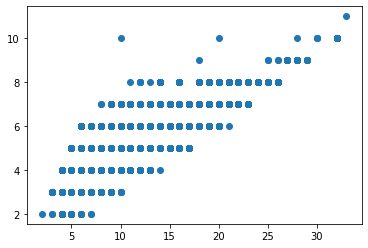

In [ ]:
plt.scatter(df.iloc[:,0].values, df.iloc[:,1].values)
plt.show()

In [ ]:
X = df
k = 2

In [ ]:
centers = X.iloc[np.random.choice(len(df), 2, replace=False)]
centers

,num_of_atoms,num_of_heavy_atoms
3311,8,5
11725,15,6


In [ ]:
distances = np.zeros((len(df), 2))
for i in range(k):
  distances[:, i] = ((X-centers.iloc[i])**2).sum(axis=1)**0.5

distances

array([[ 6.08276253,  1.        ],
       [ 3.        ,  4.12310563],
       [ 7.07106781,  0.        ],
       ...,
       [10.04987562,  3.        ],
       [ 9.05538514,  2.        ],
       [ 1.        ,  8.06225775]])

In [ ]:
distances = cdist(X, centers)
closest = np.argmin(distances, axis=1)

In [ ]:
X[closest == 0]

,num_of_atoms,num_of_heavy_atoms
1,11,5
5,8,6
14,9,5
16,9,5
17,5,4
...,...,...
14593,11,4
14598,7,3
14599,8,5
14601,11,5


In [ ]:
X[closest == 1]

,num_of_atoms,num_of_heavy_atoms
0,14,6
2,15,6
3,21,7
4,20,7
6,14,5
...,...,...
14604,16,6
14605,15,6
14606,14,6
14607,18,6


In [ ]:
for i in range(k):
  centers.iloc[i, :] = X[closest == i].mean(axis=0)

centers

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1797: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, v, pi)


,num_of_atoms,num_of_heavy_atoms
3311,8.620174,4.729971
11725,16.706096,6.367858


In [ ]:
np.random.seed(1)
centers = X.iloc[np.random.choice(len(df), k, replace=False)]
closest = np.zeros(len(df)).astype(int)

while True:
    old_closest = closest.copy()
    print(closest)
    distances = cdist(X, centers)
    closest = np.argmin(distances, axis=1)
    
    for i in range(k):
        centers.iloc[i, :] = X[closest == i].mean(axis=0)
        
    if all(closest == old_closest):
        break

[0 0 0 ... 0 0 0]
[1 0 1 ... 1 1 0]
[1 0 1 ... 1 1 0]
[1 0 1 ... 1 1 0]
[1 0 1 ... 1 1 0]


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1797: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, v, pi)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

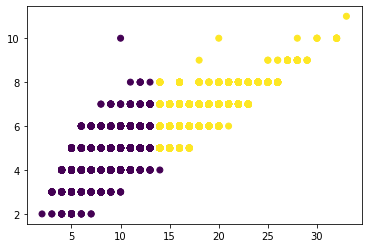

In [ ]:
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=closest)